## Um Cafezinho para começar

<img src="../img/cafe_1.png" style="height: 300px;" align="left"/>

###  Análise Inicial sobre Serie Temporais

<b> 1. Introdução: </b>

<b> 1.1. Problema: </b>

A partir de uma série temporal disponibiliza pelo artigo de "MODELAGEM POR SÉRIES TEMPORAIS DO PREÇO FUTURO DE CAFÉ" de Autoria de  Welison L. SOARES; Brenda P. F. PERNA; Katia A. CAMPOS foi feito uma análise inicial para o testes de modelo de aprendizagem de máquinas 

<b> 1.2. Dataset: </b>

Este dataset apresenta 12 linhas e 8 colunas

<b> 1.3. Objetivo: </b>
    
Executar todas as fases de um modelo de aprendizagem de máquinas supervisionado, especificamente, um modelo de Regressão e testar a acurácia do model proposto, evidenciar ajustes e melhoramentos     

<b> 2. Sobre os Dados </b>
<b> 2.1 Tabela de Dados (origem do Dataset): </b>

<img src="../img/tabela1.png" style="height: 300px;" align="left"/>

<b> 3. Codificação </b>

Iremos seguir esse pipeline, com exceção da fase da Análise Explanatória

<img src="../img/pipeline.png" style="height: 500px;" align="left"/>

<b> 3.1. Importação das Bibliotecas </b>

In [4]:
import pandas as pd

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<b> 1.2 Leitura dos Dados </b>

In [6]:
df = pd.read_csv('../data/data.csv')

In [7]:
df.head()

,i,index,mes,P1,desvio_padrao,valor_min,valor_max,valor_medio,diferenca
0,1,1,Jan,32.125,34.686,-2.561,66.812,101.273,69.148
1,1,3,Fev,37.017,43.279,-6.262,80.295,101.250,64.234
2,1,5,Mar,35.718,50.956,-15.238,86.674,50.723,15.005
3,1,6,Abr,42.889,44.501,-1.611,87.390,53.278,10.389
4,1,7,Mai,45.724,41.387,4.337,87.111,53.297,7.573


In [8]:
df.columns

Index(['i', 'index', 'mes', 'P1', 'desvio_padrao', 'valor_min', 'valor_max',
       ' valor_medio', 'diferenca'],
      dtype='object')

In [9]:
df.dtypes

i                  int64
index              int64
mes               object
P1               float64
desvio_padrao    float64
valor_min        float64
valor_max        float64
 valor_medio     float64
diferenca        float64
dtype: object

In [10]:
df_final = df[['i','index', 'P1', 'desvio_padrao', 'valor_min', 'valor_max', 'diferenca', ' valor_medio']]

In [11]:
df_final.head()

,i,index,P1,desvio_padrao,valor_min,valor_max,diferenca,valor_medio
0,1,1,32.125,34.686,-2.561,66.812,69.148,101.273
1,1,3,37.017,43.279,-6.262,80.295,64.234,101.250
2,1,5,35.718,50.956,-15.238,86.674,15.005,50.723
3,1,6,42.889,44.501,-1.611,87.390,10.389,53.278
4,1,7,45.724,41.387,4.337,87.111,7.573,53.297


<b> 3.3 Corte (Separação de Dados para Treino e Teste) (Split) </b>

In [12]:
df_train = df_final.query('i==1')
df_test  = df_final.query('i==2')

y_train = df_train[' valor_medio']
X_train = df_train.drop(' valor_medio',axis=1)

y_test = df_test[' valor_medio']
X_test = df_test.drop(' valor_medio',axis=1)

<b> 3.4 Normalização dos Dados </b>

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()

In [14]:
x_train_scaled = min_max_scaler.fit_transform(X_train)
x_test_scaled = min_max_scaler.fit_transform(X_test)

<b> 3.5 Aprendizagem de Máquina (Treinamento) </b>

In [15]:
model = LinearRegression().fit(x_train_scaled,y_train)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [18]:
regr.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

<b> 3.6 Aprendizagem de Máquina (Predição) </b>

In [19]:
y_pred = model.predict(x_test_scaled)

In [20]:
y_pred_m_rf = regr.predict(x_test_scaled)

In [21]:
y_pred_m_rf

array([30.17193167, 52.63942426, 90.7168014 ])

In [22]:
df_test.head()

,i,index,P1,desvio_padrao,valor_min,valor_max,diferenca,valor_medio
9,2,12,44.347,33.968,10.380,78.315,-6.454,37.894
10,2,4,47.182,39.557,7.625,86.739,-6.835,40.347
11,2,2,48.622,44.833,3.789,93.455,62.369,110.991


In [23]:
df_test['valor_medio_model'] = y_pred

/tmp/ipykernel_5144/3294378790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['valor_medio_model'] = y_pred


In [24]:
df_test

,i,index,P1,desvio_padrao,valor_min,valor_max,diferenca,valor_medio,valor_medio_model
9,2,12,44.347,33.968,10.380,78.315,-6.454,37.894,4.989722
10,2,4,47.182,39.557,7.625,86.739,-6.835,40.347,11.471902
11,2,2,48.622,44.833,3.789,93.455,62.369,110.991,112.846774


In [25]:
df_train

,i,index,P1,desvio_padrao,valor_min,valor_max,diferenca,valor_medio
0,1,1,32.125,34.686,-2.561,66.812,69.148,101.273
1,1,3,37.017,43.279,-6.262,80.295,64.234,101.250
2,1,5,35.718,50.956,-15.238,86.674,15.005,50.723
3,1,6,42.889,44.501,-1.611,87.390,10.389,53.278
4,1,7,45.724,41.387,4.337,87.111,7.573,53.297
5,1,8,47.164,42.620,4.544,89.783,-28.860,18.304
6,1,9,33.583,31.156,2.427,64.740,-20.424,13.160
7,1,10,38.475,29.560,8.915,68.035,-1.232,37.243
8,1,11,37.176,38.225,-1.050,75.401,2.046,39.222


In [26]:
df_test

,i,index,P1,desvio_padrao,valor_min,valor_max,diferenca,valor_medio,valor_medio_model
9,2,12,44.347,33.968,10.380,78.315,-6.454,37.894,4.989722
10,2,4,47.182,39.557,7.625,86.739,-6.835,40.347,11.471902
11,2,2,48.622,44.833,3.789,93.455,62.369,110.991,112.846774


In [27]:
df_test.columns

Index(['i', 'index', 'P1', 'desvio_padrao', 'valor_min', 'valor_max',
       'diferenca', ' valor_medio', 'valor_medio_model'],
      dtype='object')

In [29]:
df_test.columns

Index(['i', 'index', 'P1', 'desvio_padrao', 'valor_min', 'valor_max',
       'diferenca', ' valor_medio', 'valor_medio_model'],
      dtype='object')

<b> 3.7 Aprendizagem de Máquina (Avaliação do Modelo de Regressão) </b>

In [71]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance
import matplotlib.pyplot as plt


In [62]:
y_true = df_test[' valor_medio'].values

In [63]:
y_pred = df_test['valor_medio_model'].values

In [64]:
def showMetrics(y_true, y_pred):
    print ("explained variance score: ", explained_variance_score(y_true, y_pred))
    print("r2 score: ",r2_score(y_true, y_pred) )
    print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
    print("Mean Poisson deviance: ", mean_poisson_deviance(y_true, y_pred))
    print("Mean Squared Log Error: ", mean_squared_log_error(y_true, y_pred))
    

In [65]:
def createMetrics(y_true, y_pred):
    metrics = []
    metrics.append(explained_variance_score(y_true, y_pred))
    metrics.append(r2_score(y_true, y_pred))
    metrics.append(mean_absolute_error(y_true, y_pred))
    metrics.append(mean_squared_error(y_true, y_pred))
    metrics.append(mean_poisson_deviance(y_true, y_pred))
    metrics.append(mean_squared_log_error(y_true, y_pred))
    return metrics

In [66]:
def compareMetrics(y_true, y_pred1, y_pred2):
    metrics1 = createMetrics(y_true, y_pred1)
    metrics2 = createMetrics(y_true, y_pred2)
    types = ["explained variance score: ",
            "r2 score: ",
            "Mean Absolute Error: ",
            "Mean Squared Error: ",
            "Mean Poisson deviance: ",
            "Mean Squared Log Error: "]
    for i in range(len(metrics1)):
        print(types[i], metrics1[i]," ", metrics2[i])

In [69]:
showMetrics(y_true, y_pred)

explained variance score:  0.7902387206067031
r2 score:  0.44295435208705936
Mean Absolute Error:  21.211716715028942
Mean Squared Error:  639.9689085328233
Mean Poisson deviance:  43.869192313787316
Mean Squared Log Error:  1.6455327829076658


In [68]:
compareMetrics(y_true, y_pred, y_pred_m_rf)

explained variance score:  0.7902387206067031   0.843447015482242
r2 score:  0.44295435208705936   0.8195963076801126
Mean Absolute Error:  21.211716715028942   13.429563730158725
Mean Squared Error:  639.9689085328233   207.25905408616254
Mean Poisson deviance:  43.869192313787316   3.05924181688872
Mean Squared Log Error:  1.6455327829076658   0.05220555006235859


In [83]:
def plotGraphic(y_true, y_pred):
    plt.plot(y_true, label='Valores Reais')
    plt.plot(y_pred, label='Valores previstos')

    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.title('Gráfico de Resultados')

    plt.legend(['Valores Reais', 'Valores Previstos'])

    plt.show()

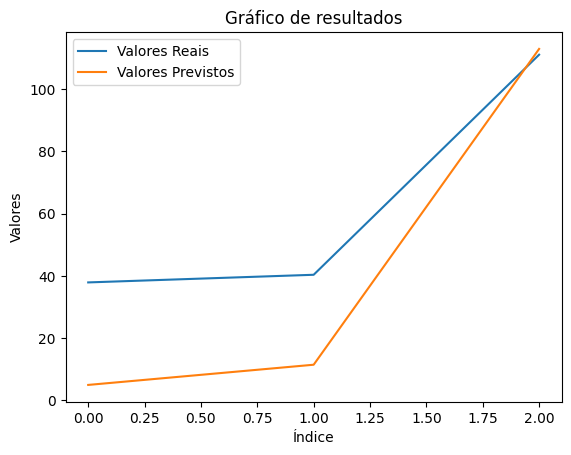

In [82]:
plotGraphic(y_true, y_pred)

In [33]:
# y_true = [3, -0.5, 2, 7]
#y_pred = [2.5, 0.0, 2, 8]
#explained_variance_score(y_true, y_pred)

<b> 3.8 Conclusão </b>

In [34]:
### Em construção